In [1]:
import pandas as pd
train_dataset = pd.read_csv("features/v1/learn.csv")
train_features = train_dataset.drop("loan_status", axis=1)
train_labels = train_dataset.loan_status

In [2]:
train_dataset

,loan_date,loan_amount,loan_duration,loan_payments,loan_status,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance
0,940105,80952,24,3373,1,930226,54,7954.257407,1100.0,67529.6,32590.624074
1,960429,30276,12,2523,-1,950407,80,5856.300000,715.0,58157.5,25197.092500
2,960502,165960,24,6915,1,941019,125,12822.353600,700.0,107069.6,52523.244800
3,961106,88440,12,7370,1,960511,31,14850.767742,200.0,103239.0,62778.090323
4,940531,104808,12,8734,1,931126,30,6642.553333,500.0,57865.3,38709.830000
...,...,...,...,...,...,...,...,...,...,...,...
323,961002,392460,60,6541,1,941124,143,12882.523077,900.0,115913.4,57131.740559
324,930915,52788,12,4399,1,930114,43,3714.897674,1000.0,41469.1,22198.179070
325,951029,419880,60,6998,1,950526,18,24426.472222,200.0,104039.9,59352.833333
326,960806,54024,12,4502,1,941001,147,8708.722449,1000.0,81705.8,36480.185034


In [3]:
# Standarization

from sklearn.preprocessing import StandardScaler

# Everything except loan_duration, loan_status
features_to_standardize = ["loan_date", "loan_amount", "loan_payments", "account_creation", "transaction_count", "transaction_avg_amount", "transaction_min_balance", "transaction_max_balance", "transaction_avg_balance"]
train_dataset_to_scale = train_dataset[features_to_standardize]

# Scaler
scaler = StandardScaler()
scaled_train_dataset = pd.DataFrame(scaler.fit_transform(train_dataset_to_scale), columns = train_dataset_to_scale.columns)

scaled_train_dataset

,loan_date,loan_amount,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance
0,-1.042517,-0.612414,-0.355176,-0.985717,-0.461789,-0.374774,0.425408,-0.608173,-0.807099
1,1.101134,-1.094644,-0.743255,0.951110,0.118886,-0.872515,0.076796,-0.880016,-1.364673
2,1.108834,0.196517,1.261973,0.050117,1.123901,0.780185,0.063214,0.538711,0.696095
3,1.172540,-0.541159,1.469709,1.920818,-0.975464,1.261427,-0.389528,0.427602,1.469452
4,-0.997585,-0.385402,2.092462,-0.899342,-0.997797,-0.685976,-0.117883,-0.888492,-0.345626
...,...,...,...,...,...,...,...,...,...
323,1.161571,2.351879,1.091218,0.060194,1.525907,0.794460,0.244311,0.795231,1.043640
324,-2.011822,-0.880421,0.113258,-0.996466,-0.707460,-1.380564,0.334860,-1.364074,-1.590832
325,0.109680,2.612807,1.299868,0.962530,-1.265802,3.533269,-0.389528,0.450833,1.211141
326,1.140898,-0.868660,0.160285,0.048390,1.615242,-0.195776,0.334860,-0.196983,-0.513772


In [4]:
# Binarization

from sklearn.preprocessing import Binarizer

train_dataset_to_binarize = train_dataset[["loan_status"]]

# 0 <==> loan_status = -1
# 1 <==> loan_status = 1
binarizer = Binarizer()
binarized_train_data_set = pd.DataFrame(binarizer.fit_transform(train_dataset_to_binarize), columns = train_dataset_to_binarize.columns)

binarized_train_data_set

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
323,1
324,1
325,1
326,1


In [5]:
# One-hot encoder

from sklearn.preprocessing import OneHotEncoder

train_dataset_to_hotencode = train_dataset[["loan_duration"]]

encoder = OneHotEncoder(sparse=False)
res = encoder.fit(train_dataset_to_hotencode)

column_names = [f"is_loan_duration {duration_val}" for duration_val in res.categories_[0]]

hot_encoded_train_dataset = pd.DataFrame(res.transform(train_dataset_to_hotencode), columns = column_names)

hot_encoded_train_dataset

,is_loan_duration 12,is_loan_duration 24,is_loan_duration 36,is_loan_duration 48,is_loan_duration 60
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
323,0.0,0.0,0.0,0.0,1.0
324,1.0,0.0,0.0,0.0,0.0
325,0.0,0.0,0.0,0.0,1.0
326,1.0,0.0,0.0,0.0,0.0


In [6]:
# Recreate train_dataset after preprocessing

pre_processed_dataframe = scaled_train_dataset
pre_processed_dataframe["loan_status"] = binarized_train_data_set.values
for column_name in hot_encoded_train_dataset.columns:
    pre_processed_dataframe[column_name] = hot_encoded_train_dataset[column_name]

pre_processed_dataframe

,loan_date,loan_amount,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance,loan_status,is_loan_duration 12,is_loan_duration 24,is_loan_duration 36,is_loan_duration 48,is_loan_duration 60
0,-1.042517,-0.612414,-0.355176,-0.985717,-0.461789,-0.374774,0.425408,-0.608173,-0.807099,1,0.0,1.0,0.0,0.0,0.0
1,1.101134,-1.094644,-0.743255,0.951110,0.118886,-0.872515,0.076796,-0.880016,-1.364673,0,1.0,0.0,0.0,0.0,0.0
2,1.108834,0.196517,1.261973,0.050117,1.123901,0.780185,0.063214,0.538711,0.696095,1,0.0,1.0,0.0,0.0,0.0
3,1.172540,-0.541159,1.469709,1.920818,-0.975464,1.261427,-0.389528,0.427602,1.469452,1,1.0,0.0,0.0,0.0,0.0
4,-0.997585,-0.385402,2.092462,-0.899342,-0.997797,-0.685976,-0.117883,-0.888492,-0.345626,1,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1.161571,2.351879,1.091218,0.060194,1.525907,0.794460,0.244311,0.795231,1.043640,1,0.0,0.0,0.0,0.0,1.0
324,-2.011822,-0.880421,0.113258,-0.996466,-0.707460,-1.380564,0.334860,-1.364074,-1.590832,1,1.0,0.0,0.0,0.0,0.0
325,0.109680,2.612807,1.299868,0.962530,-1.265802,3.533269,-0.389528,0.450833,1.211141,1,0.0,0.0,0.0,0.0,1.0
326,1.140898,-0.868660,0.160285,0.048390,1.615242,-0.195776,0.334860,-0.196983,-0.513772,1,1.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import OneHotEncoder

def pre_process_dataset(dataset, is_test_dataset):
    # Standarization

    # Everything except loan_duration, loan_status
    features_to_standardize = ["loan_date", "loan_amount", "loan_payments", "account_creation", "transaction_count", "transaction_avg_amount", "transaction_min_balance", "transaction_max_balance", "transaction_avg_balance"]
    dataset_to_scale = dataset[features_to_standardize]

    scaler = StandardScaler()
    scaled_dataset = pd.DataFrame(scaler.fit_transform(dataset_to_scale), columns = dataset_to_scale.columns)

    # Binarization
    if not is_test_dataset:
        dataset_to_binarize = dataset[["loan_status"]]

        # 0 <==> loan_status = -1
        # 1 <==> loan_status = 1
        binarizer = Binarizer()
        binarized_data_set = pd.DataFrame(binarizer.fit_transform(dataset_to_binarize), columns = dataset_to_binarize.columns)

    # One-hot encoder
    dataset_to_hotencode = dataset[["loan_duration"]]

    encoder = OneHotEncoder(sparse=False)
    res = encoder.fit(dataset_to_hotencode)

    column_names = [f"is_loan_duration {duration_val}" for duration_val in res.categories_[0]]

    hot_encoded_dataset = pd.DataFrame(res.transform(dataset_to_hotencode), columns = column_names)

    # Recreate dataset after preprocessing
    pre_processed_dataframe = scaled_dataset
    for column_name in hot_encoded_dataset.columns:
        pre_processed_dataframe[column_name] = hot_encoded_dataset[column_name]

    if not is_test_dataset:
        pre_processed_dataframe["loan_status"] = binarized_data_set.values

    return pre_processed_dataframe
    

In [8]:
pre_processed_dataframe = pre_process_dataset(train_dataset, False)
pre_processed_features = pre_processed_dataframe.drop("loan_status", axis=1)
pre_processed_labels = pre_processed_dataframe.loan_status

In [9]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=19, sampling_strategy="auto")
features_res, labels_res = smt.fit_resample(pre_processed_features, pre_processed_labels)

In [10]:
from  sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_res, labels_res, random_state=19)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

def watch_random_forest_overfit(x_train, x_test, y_train, y_test):
    train_scores = []
    test_scores = []

    estimators = []
    # scores = []
    classifiers = []
    technique = []

    for estimator in range(1, 50):
        rf = RandomForestClassifier(n_estimators= estimator, random_state = 19)
        rf.fit(x_train, y_train)

        # Evaluate train
        train_yhat = rf.predict(x_train)
        train_acc = accuracy_score(y_train, train_yhat)
        train_scores.append(train_acc)

        # Evaluate test
        test_yhat = rf.predict(x_test)
        test_acc = accuracy_score(y_test, test_yhat)
        test_scores.append(test_acc)

        estimators.append(estimator)
        # scores.append(rf.score(x_test, y_test))
        classifiers.append(rf)
        technique.append("random forest")

    pyplot.plot(estimators, train_scores, '-o', label='Train')
    pyplot.plot(estimators, test_scores, '-o', label='Test')
    pyplot.legend()
    pyplot.show()

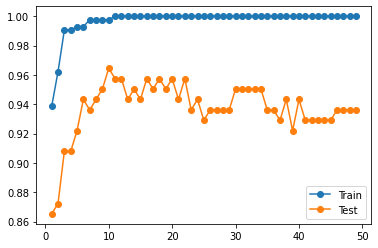

In [12]:
watch_random_forest_overfit(x_train, x_test, y_train, y_test)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

def watch_kneighbors_overfit(x_train, x_test, y_train, y_test):
    neighbors = []
    classifiers = []

    train_scores = []
    test_scores = []

    for neighbor in range(1,50):
        kn = KNeighborsClassifier(n_neighbors=neighbor)
        kn.fit(x_train, y_train)

        # Evaluate train
        train_yhat = kn.predict(x_train)
        train_acc = accuracy_score(y_train, train_yhat)
        train_scores.append(train_acc)

        # Evaluate test
        test_yhat = kn.predict(x_test)
        test_acc = accuracy_score(y_test, test_yhat)
        test_scores.append(test_acc)

        neighbors.append(neighbor)
        classifiers.append(kn)
    
    pyplot.plot(neighbors, train_scores, '-o', label='Train')
    pyplot.plot(neighbors, test_scores, '-o', label='Test')
    pyplot.legend()
    pyplot.show()

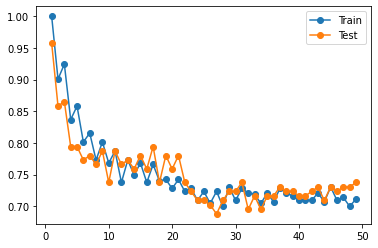

In [67]:
watch_kneighbors_overfit(x_train, x_test, y_train, y_test)

In [70]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

# !!! No more convergence warnings
simplefilter("ignore", category=ConvergenceWarning)

shapes = []
activations = []
learn_rates = []
# scores = []
classifiers = []
technique = []

def watch_overfit_mlp(x_train, x_test, y_train, y_test): 
    for activation in ["logistic", "tanh", "relu"]:
        print(f"Activation = {activation}")

        for learn_rate in ["constant", "invscaling", "adaptive"]:
            print(f"Learn Rate = {learn_rate}")

            for n_layers in range(1, 6):
                print(f"# Layers = {n_layers}")

                train_scores = []
                test_scores = []
                layer_sizes = []

                for layer_size in range(4, 20):
                    shape = tuple(layer_size for _ in range(n_layers))
                    shapes.append(shape)
                    activations.append(activation)
                    learn_rates.append(learn_rate)
                    layer_sizes.append(layer_size)

                    nn = MLPClassifier(hidden_layer_sizes=shape, activation=activation, learning_rate=learn_rate, random_state=19)
                    nn.fit(x_train, y_train)

                    # Evaluate train
                    train_yhat = nn.predict(x_train)
                    train_acc = accuracy_score(y_train, train_yhat)
                    train_scores.append(train_acc)

                    # Evaluate test
                    test_yhat = nn.predict(x_test)
                    test_acc = accuracy_score(y_test, test_yhat)
                    test_scores.append(test_acc)

                    classifiers.append(nn)
                    technique.append("Multi Layer Perceptron")
                    # scores.append(nn.score(x_test, y_test))

                pyplot.plot(layer_sizes, train_scores, '-o', label='Train')
                pyplot.plot(layer_sizes, test_scores, '-o', label='Test')
                pyplot.legend()
                pyplot.show()
    

Activation = logistic
Learn Rate = constant
# Layers = 1


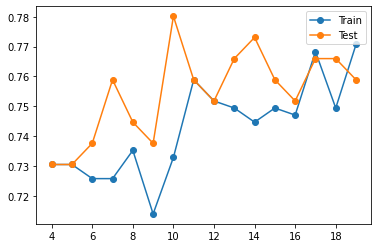

# Layers = 2


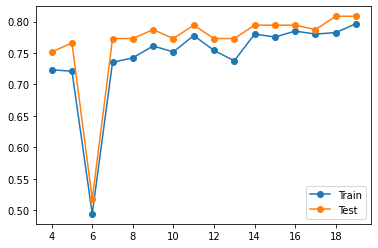

# Layers = 3


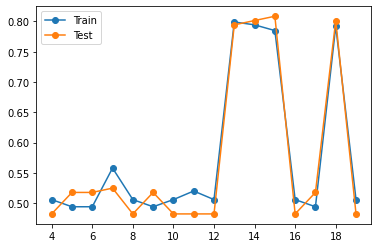

# Layers = 4


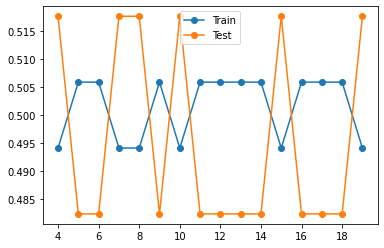

# Layers = 5


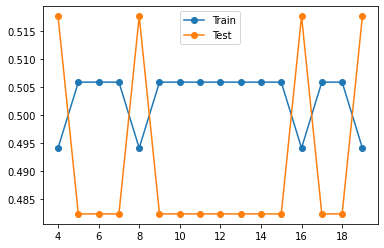

Learn Rate = invscaling
# Layers = 1


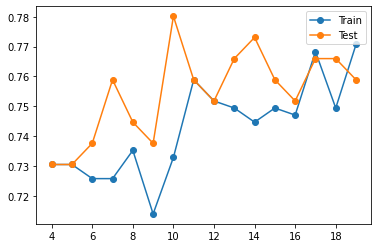

# Layers = 2


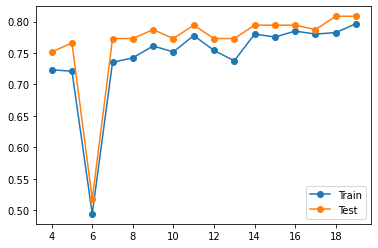

# Layers = 3


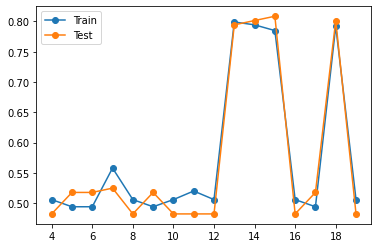

# Layers = 4


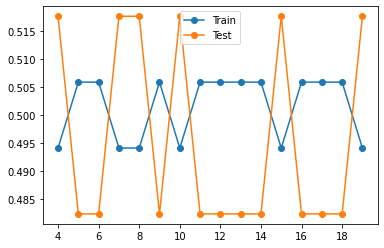

# Layers = 5


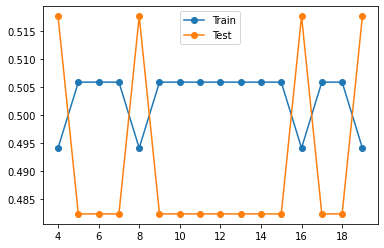

Learn Rate = adaptive
# Layers = 1


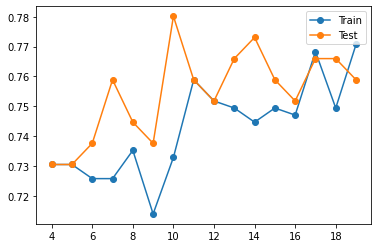

# Layers = 2


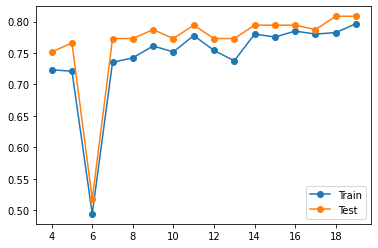

# Layers = 3


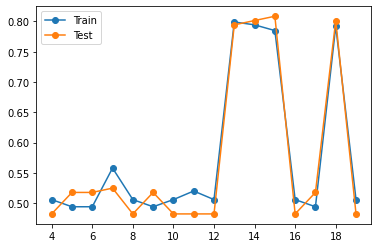

# Layers = 4


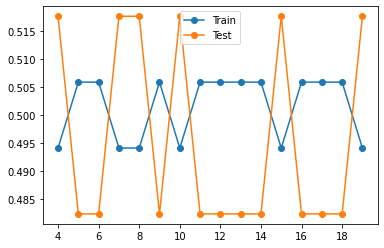

# Layers = 5


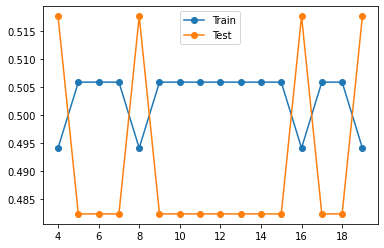

Activation = tanh
Learn Rate = constant
# Layers = 1


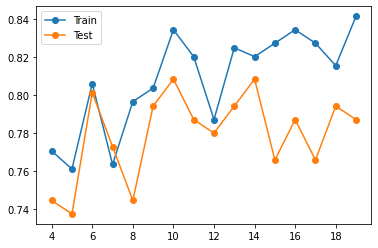

# Layers = 2


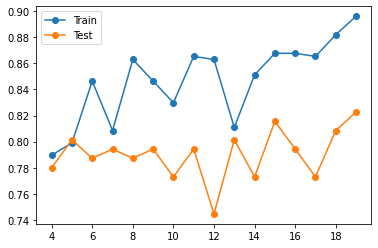

# Layers = 3


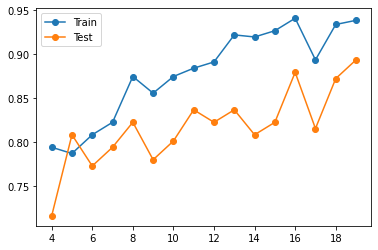

# Layers = 4


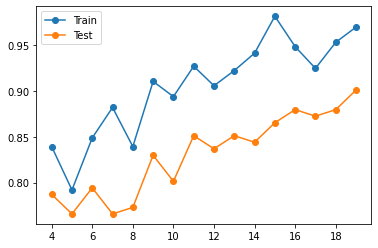

# Layers = 5


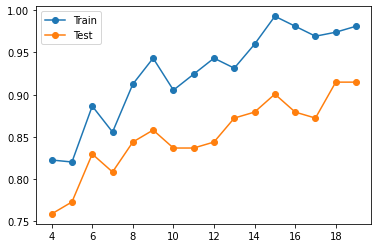

Learn Rate = invscaling
# Layers = 1


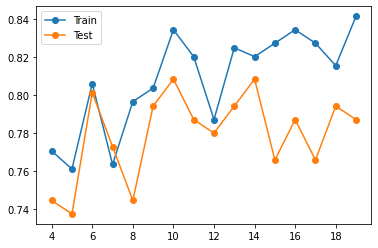

# Layers = 2


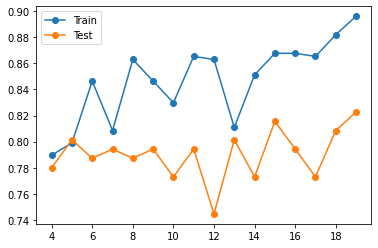

# Layers = 3


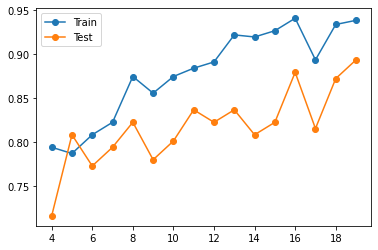

# Layers = 4


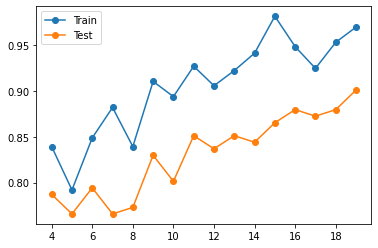

# Layers = 5


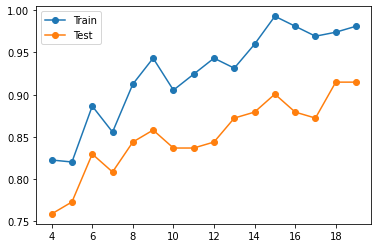

Learn Rate = adaptive
# Layers = 1


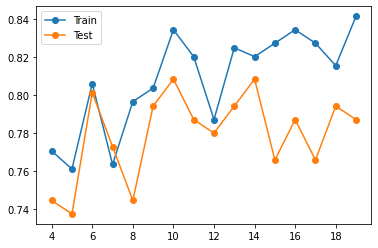

# Layers = 2


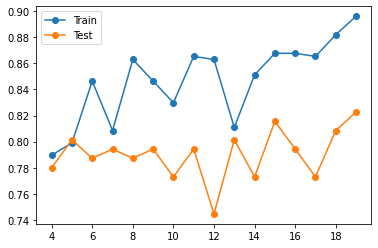

# Layers = 3


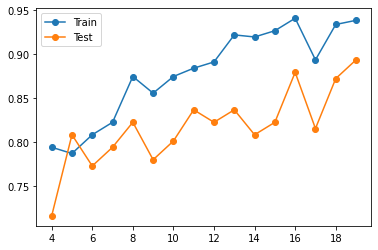

# Layers = 4


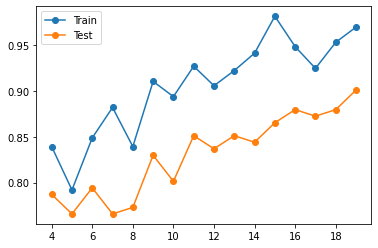

# Layers = 5


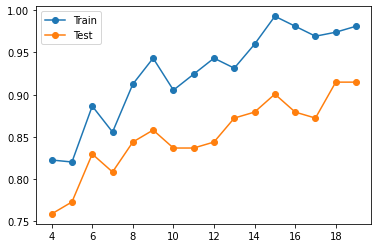

Activation = relu
Learn Rate = constant
# Layers = 1


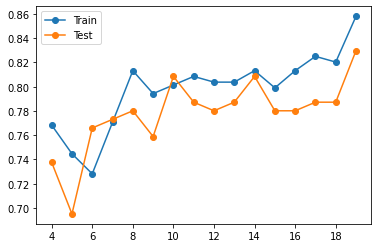

# Layers = 2


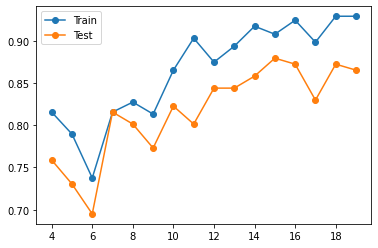

# Layers = 3


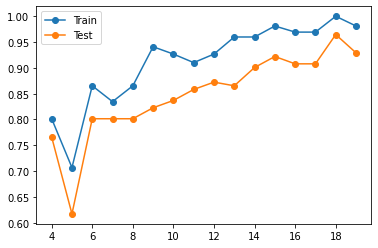

# Layers = 4


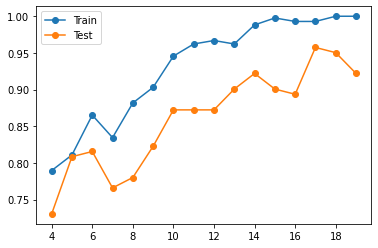

# Layers = 5


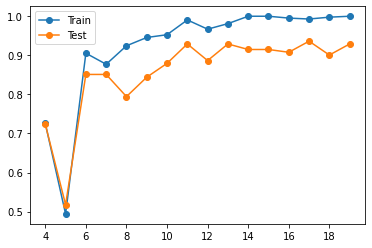

Learn Rate = invscaling
# Layers = 1


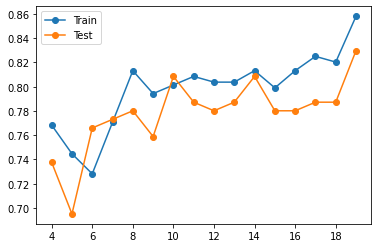

# Layers = 2


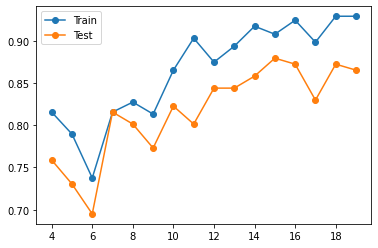

# Layers = 3


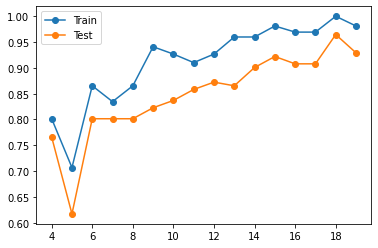

# Layers = 4


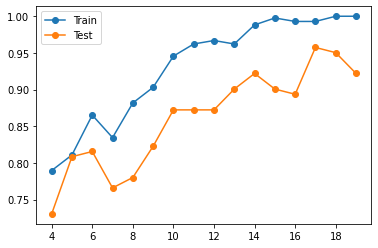

# Layers = 5


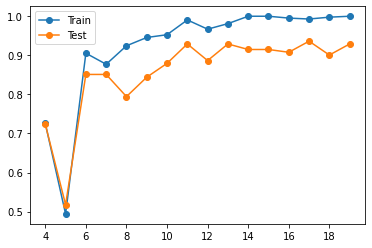

Learn Rate = adaptive
# Layers = 1


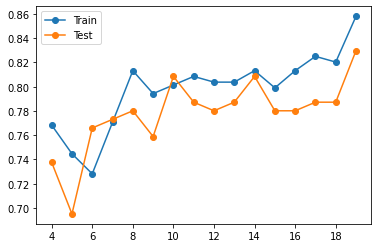

# Layers = 2


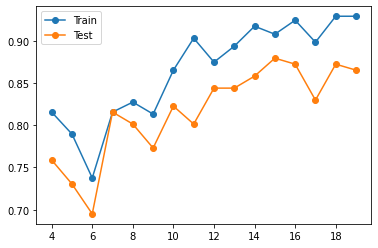

# Layers = 3


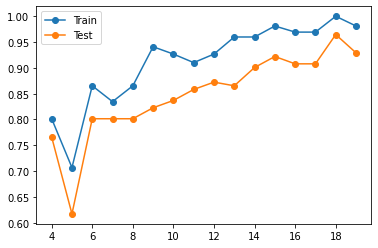

# Layers = 4


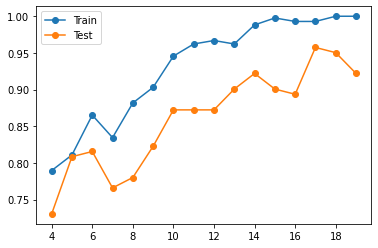

# Layers = 5


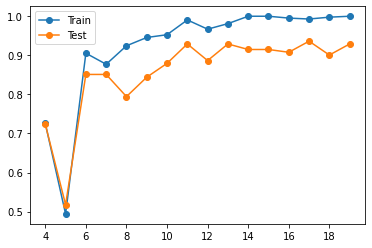

In [71]:
watch_overfit_mlp(x_train, x_test, y_train, y_test)

In [13]:
target_dataset = pd.read_csv("features/v1/test.csv")

target_features = pre_process_dataset(target_dataset, True)
target_ids = target_dataset.loan_id

In [14]:
rf = RandomForestClassifier(n_estimators=10, random_state = 19)
rf.fit(x_train, y_train)

probabilities = rf.predict_proba(target_features)
positive_probabilities = [row[0] for row in probabilities]

In [15]:
import csv
with open("predictions/v1/random_forest_resampled_preprocessed_10est.csv", "w") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(["Id", "Predicted"])
    writer.writerows(zip(target_ids, positive_probabilities))